In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
n_splits = 5
test_size = 0.2
random_state = 42
shuffle = True
flip = False

In [3]:
x = pd.read_csv('../../data/node/u.txt', index_col=None, header=None).T
y = pd.read_csv('../../data/node/du.txt', index_col=None, header=None).T
x = x.values
y = y.values
if flip:
    t = x
    x = y
    y = t
x.shape, y.shape

((2501, 19), (2501, 19))

In [4]:
r2_train_list, r2_test_list = [], []
sss = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
for split, (train_index, test_index) in enumerate(sss.split(x, y)):
    print(f"Fold {split+1}/{n_splits} \n\t Train...")
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler_x = StandardScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)
    
#     model = RandomForestRegressor(random_state=random_state)
#     model = LinearRegression()
    model = MLPRegressor()
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    y_train = scaler_y.inverse_transform(y_train)
    y_test = scaler_y.inverse_transform(y_test)
    y_train_pred = scaler_y.inverse_transform(y_train_pred)
    y_test_pred = scaler_y.inverse_transform(y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

Fold 1/5 
	 Train...
Fold 2/5 
	 Train...
Fold 3/5 
	 Train...
Fold 4/5 
	 Train...
Fold 5/5 
	 Train...


In [5]:
for split in range(n_splits):
    print(f"Fold {split+1}/{n_splits}")
    print(f'\t R2 train: {np.median(r2_train_list):.2f} +- {4*stats.sem(r2_train_list):.2f}')
    print(f'\t R2 test: {np.median(r2_test_list):.2f} +- {4*stats.sem(r2_test_list):.2f}')

Fold 1/5
	 R2 train: 0.99 +- 0.00
	 R2 test: 0.99 +- 0.02
Fold 2/5
	 R2 train: 0.99 +- 0.00
	 R2 test: 0.99 +- 0.02
Fold 3/5
	 R2 train: 0.99 +- 0.00
	 R2 test: 0.99 +- 0.02
Fold 4/5
	 R2 train: 0.99 +- 0.00
	 R2 test: 0.99 +- 0.02
Fold 5/5
	 R2 train: 0.99 +- 0.00
	 R2 test: 0.99 +- 0.02


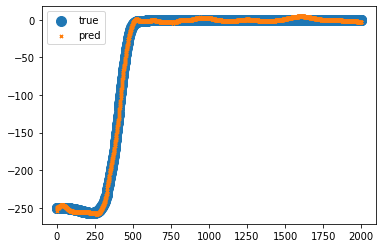

In [6]:
t_train = np.arange(0, len(y_train))
plt.figure()
plt.scatter(t_train, y_train[:, 0], label='true', s=100)
plt.scatter(t_train, y_train_pred[:, 0], label='pred', marker='x', s=10)
plt.legend()
plt.show()